# Tugas Praktikum Minggu 5
### Nicholas Juan Kalvin P. | 162012133068
<hr>



# Audio Mining

## Tugas Praktikum:

Lakukan Audio Mining dan interpretasikan hasil analisa audio yang telah dilakukan!

<hr>


### Step 1: Loading Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from glob import glob
import librosa as lr
from IPython import display as ipd

In [4]:
data_dir = '.\\nicolas\\recordings\\'
audio_files = glob(data_dir + '/*_nicolas_*.wav')
len(audio_files)

500

Loading data dilakukan menggunakan Glob, karena Glob dapat menerima format penamaan yang spesifik. Dataset digits mempunyai beberapa aktor suara dengan penamaan file yang terindeks dan label nomor yang disebutkan. Hal ini membuat pengambilan data lebih sulit.<br><br>Dengan menggunakan Glob, nomor indeks dan label nomor dapat di lewati menggunakan simbol "*" yang adalah wildcard (pilih semua) sedangkan, penamaan dituliskan \_nicolas_ untuk memilih semua file yang disuarai oleh "nicolas"

### Step 2: Visualizing Data

In [8]:
#read first audio file, set time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio))/sfreq
time

array([-0.00130843, -0.00555463, -0.00755973, ..., -0.00734698,
       -0.00388721,  0.        ], dtype=float32)

Untuk mendefinisikan variabel array time yang dibuat untuk plot / grafik, tersusun dari 0 sampai panjang amplitudo, yang lalu dibagi frekuensi. 

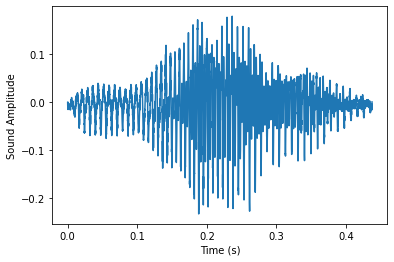

In [9]:
#plot audio over time
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')
plt.show()

Menggunakan variabel time yang telah terdefinisi, dibuat plot amplitudo per waktu yang memperlihatkan kapan suara terdengar paling keras.   

.\nicolas\recordings\0_nicolas_0.wav


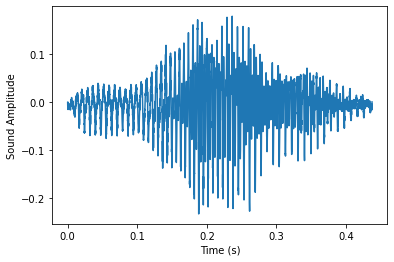

.\nicolas\recordings\2_nicolas_0.wav


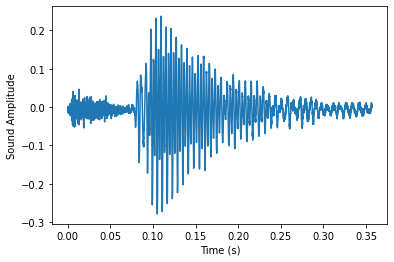

.\nicolas\recordings\4_nicolas_0.wav


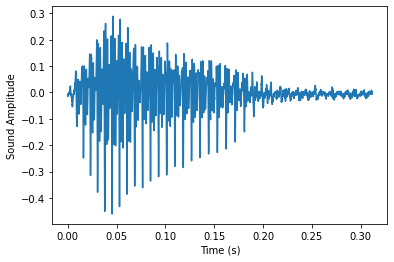

.\nicolas\recordings\6_nicolas_0.wav


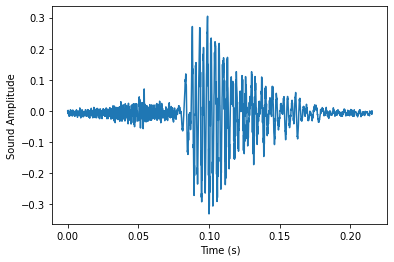

.\nicolas\recordings\8_nicolas_0.wav


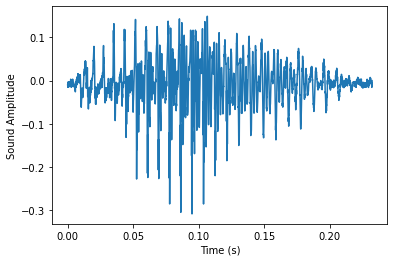

In [16]:
#read all audio files
for file in range(0, len(audio_files), 100):
    #read audio file, set time array
    audio, sfreq = lr.load(audio_files[file])
    time = np.arange(0, len(audio))/sfreq
    
    print(audio_files[file])
    #plot audio over time
    fig, ax = plt.subplots()
    ax.plot(time,audio)
    ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')
    plt.show()

Menggunakan pengulangan for dengan step sebanyak 100 (500 file / 100 = 5 sample) dapat diketahui grafik amplitudo yang berbeda-beda karena penyebutan angka yang berbeda pula. 

### Step 3: Mendengarkan Sample

In [38]:
# Play audio file
ipd.Audio(audio_files[4])

Menggunakan library IPython display, dengan atribut file audio, IPD akan menampilkan audio controller GUI yang membolehkan kita untuk mendengarkan sample suara

### Step 4: Audio Data Analysis

In [35]:
y, sr = lr.load(audio_files[4])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.00159747  0.00150988 -0.00024246 -0.00210504 -0.00207909  0.00028924
  0.00309189  0.00338308 -0.00032665 -0.00658802]
shape y: (12109,)
sr: 22050


Menggunakan library librosa, kita dapat menjabarkan file audio agar menghasilkan samplerate dan y (array time series audio). 

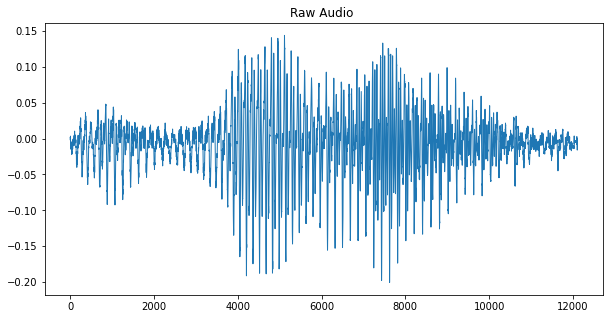

In [45]:
# Trimming leading/lagging silence
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio ')
plt.show()

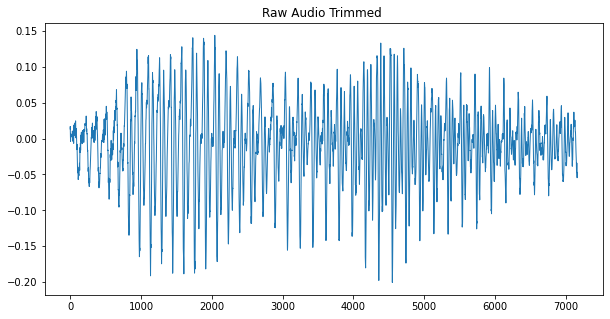

In [46]:
# Trimming leading/lagging silence
y_trimmed, _ = lr.effects.trim(y, top_db=9)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed ')
plt.show()

Trimming dilakukan untuk memotong bagian yang sunyi di awal atau akhir suara (fade in atau fade out) menyisakan bunyi utama di tengah. Hal ini dilakukan dengan alasan yang sama seperti gambar di crop terlebih dahulu pada image processing

In [48]:
y

array([ 0.00159747,  0.00150988, -0.00024246, ..., -0.00507924,
       -0.0012379 ,  0.        ], dtype=float32)

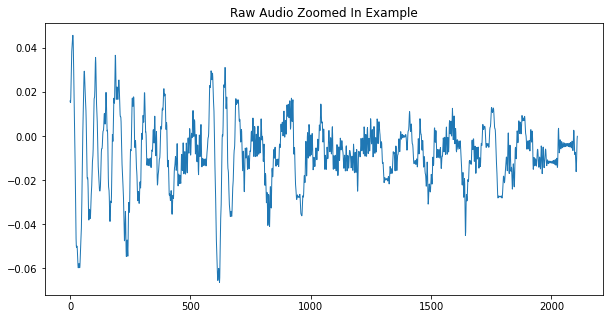

In [54]:
pd.Series(y[10000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example')
plt.show()

Zoom in pada plt plot dapat dilkukan dengan cara memotong langsung data, menyisakan beberapa variabel ditengah. Karena bagian audio yang cenderung lebi kecil, maka data file audio lebih besar di tampilkan pada plot plt.

In [55]:
D = lr.stft(y)
S_db = lr.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 24)

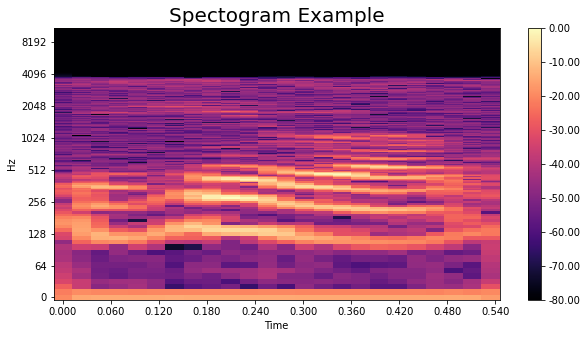

In [57]:
import librosa.display

# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = lr.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

Spectogram dari suara menjelaskan bahwa suara sangat spesifik atau terkonsentrasi pada frekuensi 128Hz sampai 1024HHz dan juga tidak terdapat ruang kosong atau jeda pada suara

In [58]:
S = lr.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = lr.amplitude_to_db(S, ref=np.max)

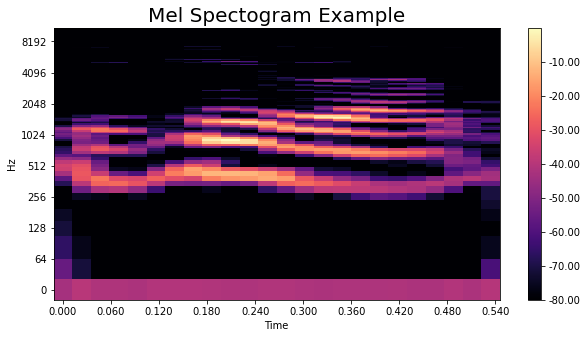

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = lr.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

Mel Spectogram, adalah spectogram dimana frekuensinya sudah di sesuaikan dengan pendengaran manusia mengikuti skala mel. Dari sini konsentrasi suara lebih jelas terlihat dan diketahui bahwa frekuensi ternyata terkonsentrasi mulai dari 256Hz sampai 2048Hz.